In [1]:
#@title Import
from google.colab import drive
drive.mount('/content/drive/')
project_path = '/content/drive/MyDrive/opencv/'
print(f'Currently at {project_path}')

import cv2
from google.colab.patches import cv2_imshow
import numpy as np

Mounted at /content/drive/
Currently at /content/drive/MyDrive/opencv/


# Part 1: Basics

## Lesson 1: Changing image's color profiles

Image shape: (337, 600, 3)
Grayscale image shape: (337, 600)
HSV image shape: (337, 600, 3)


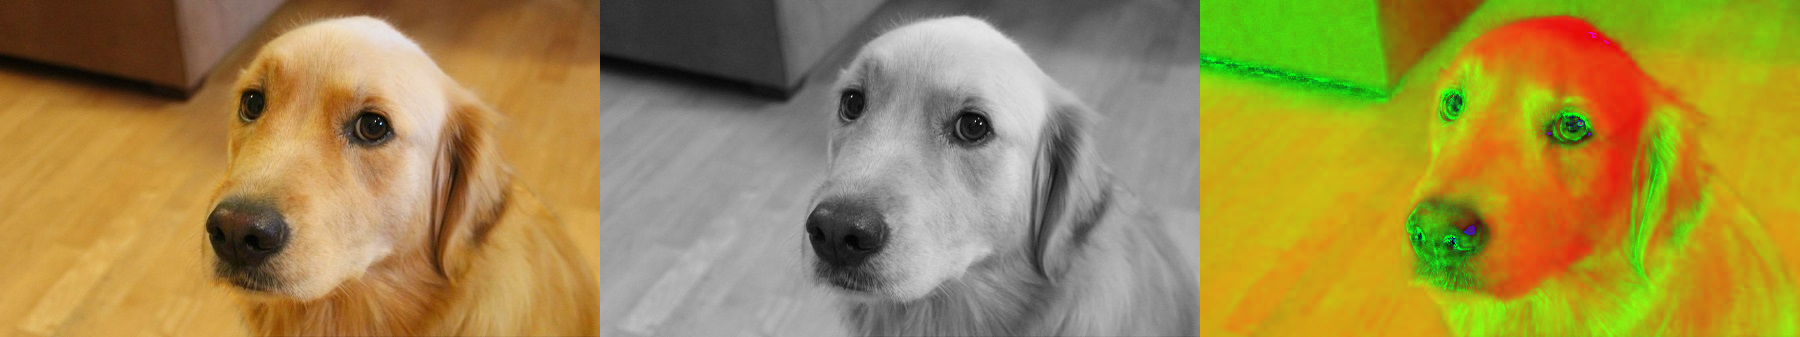

In [ ]:
# Load image
image = cv2.imread(project_path + '/data/bobby.jpg')
# Convert to grayscale
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
# Convert to HSV (Pros: All colors under one channel)
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

print(f'Image shape: {image.shape}')
print(f'Grayscale image shape: {image_gray.shape}')
print(f'HSV image shape: {image_hsv.shape}')

display = np.hstack((image, np.stack((image_gray,)*3, axis = 2), image_hsv))
cv2_imshow(display)

## Lesson 2: Edge Detection

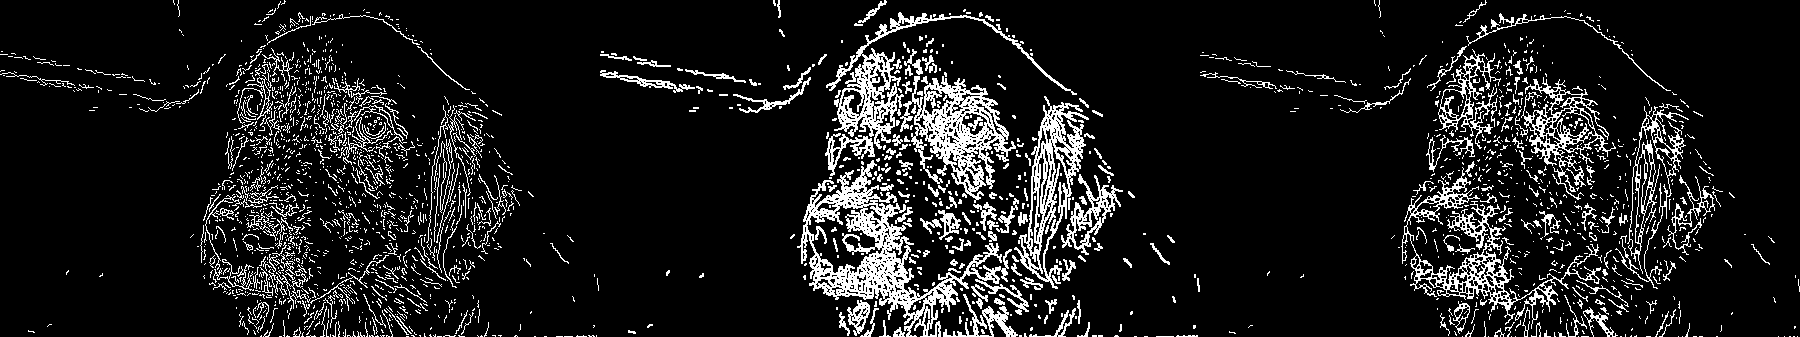

In [ ]:
image = cv2.imread(project_path + '/data/bobby.jpg')

# Canny edge detection algorithm
# Take grayscale input
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
image_canny = cv2.Canny(image_gray, 50, 60)

# Dilation & Erosion
# Help denoise edge detection
kernel = np.ones((2, 2), np.uint8)
image_dilate = cv2.dilate(image_canny, kernel, iterations = 1)
image_erode = cv2.erode(image_dilate, kernel, iterations = 1)

display = np.hstack((image_canny, image_dilate, image_erode))
cv2_imshow(display)

## Lesson 3: Image manipulation - Noise removal

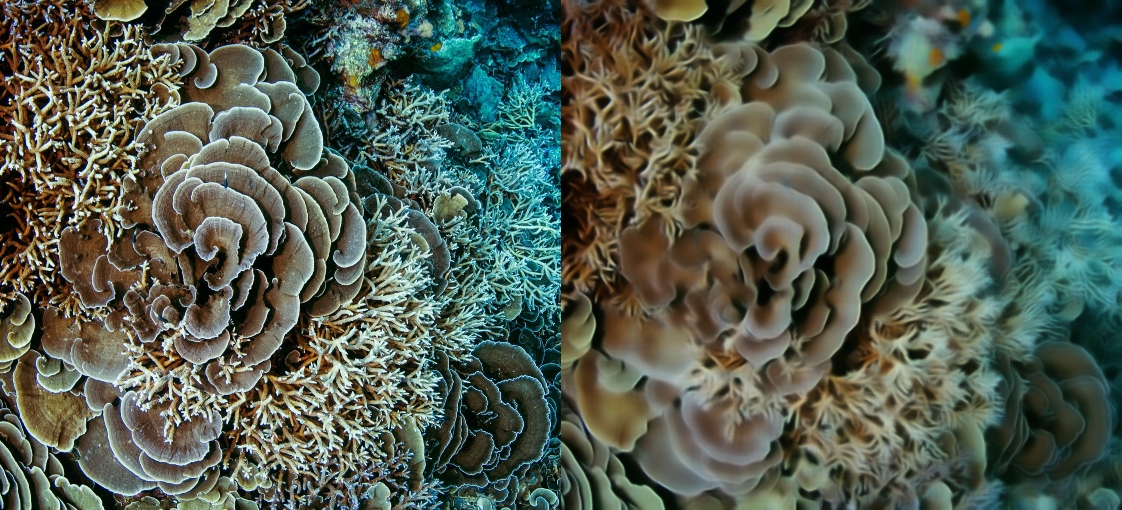

In [ ]:
image = cv2.imread(project_path + '/data/coral.jpg')

# Resize because image too large
image = cv2.resize(image, dsize = None, fx = 0.4, fy = 0.4)
# Non-local Means Denoising algorithm
image_denoise = cv2.fastNlMeansDenoisingColored(image, None, 50, 20, 7, 15)

# Show image
display = np.hstack((image, image_denoise))
cv2_imshow(display)

## Lesson 4: Drawing shapes & Writing text on images

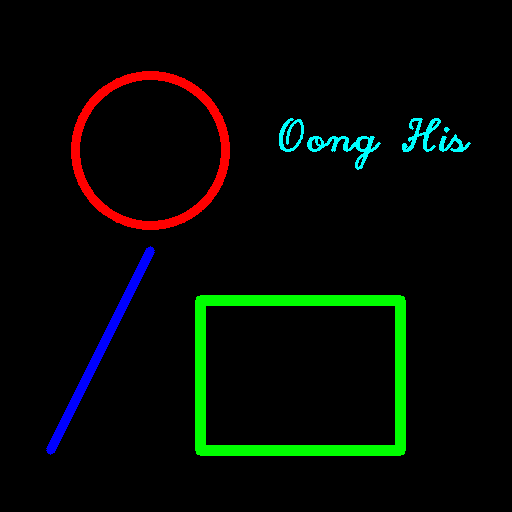

In [ ]:
# Black background
image = np.zeros((512, 512, 3), np.uint8) #uint8: 0 <= value <= 255

# Drawing functions: circle, rectangle, triangle
cv2.circle(image, (150, 150), 75, (0, 0, 255), 8)
cv2.rectangle(image, (200, 300), (400, 450), (0, 255, 0), 10)
cv2.line(image, (50, 450), (150, 250), (255, 0, 0), 8)
cv2.putText(image, 'Oong His', (275, 150),
            fontFace = cv2.FONT_HERSHEY_SCRIPT_COMPLEX,
            fontScale = 1.5,
            color = (255, 255, 0),
            thickness = 2)
cv2_imshow(image)

# Part 2: Intermediate lessons

## Lesson 1: Color detection

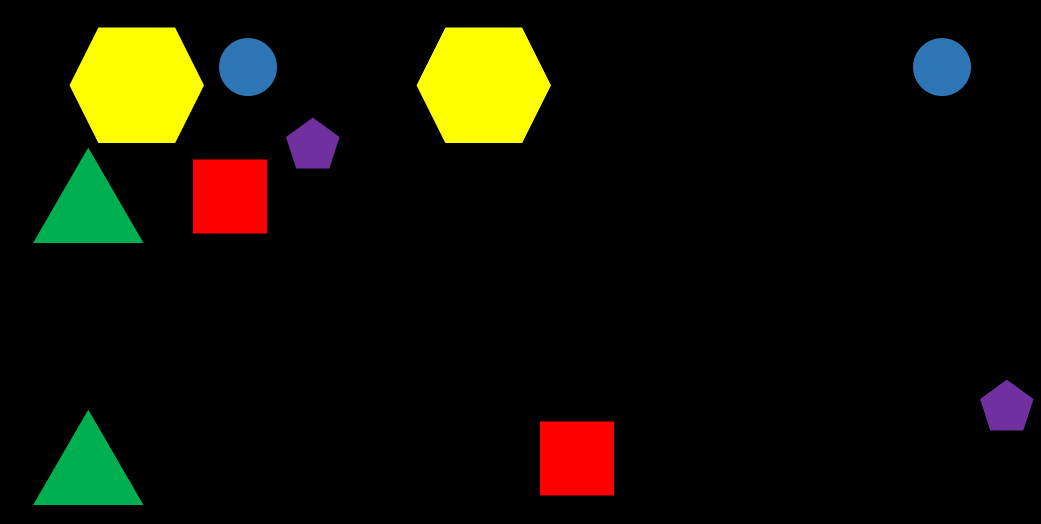

In [ ]:
image = cv2.imread(project_path + '/data/shapes.png')
image = cv2.resize(image, dsize = None, fx = 0.5, fy = 0.5)

# Convert from BGR to HSV for easier color detection
image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

lower_blue = np.array ([100, 70, 50])
upper_blue = np.array ([135, 255, 255])
mask_blue = cv2.inRange(image_hsv, lower_blue, upper_blue)
blue = cv2.bitwise_and(image, image, mask = mask_blue)

lower_green = np.array ([40, 70, 50])
upper_green = np.array ([75, 255, 255])
mask_green = cv2.inRange(image_hsv, lower_green, upper_green)
green = cv2.bitwise_and(image, image, mask = mask_green)

lower_purple = np.array ([135, 70, 50])
upper_purple = np.array ([145, 255, 255])
mask_purple = cv2.inRange(image_hsv, lower_purple, upper_purple)
purple = cv2.bitwise_and(image, image, mask = mask_purple)

lower_yellow = np.array ([25, 70, 50])
upper_yellow = np.array ([35, 255, 255])
mask_yellow = cv2.inRange(image_hsv, lower_yellow, upper_yellow)
yellow = cv2.bitwise_and(image, image, mask = mask_yellow)

# Red hue spreads through two regions (170 - 180 and 0 - 10)
lower_red = np.array([170, 70, 50])
upper_red = np.array([10, 255, 255])
mask_red_1 = cv2.inRange(image_hsv, lower_red, np.array([180, 255, 255]))
mask_red_2 = cv2.inRange(image_hsv, np.array([0, 70, 50]), upper_red)
red = cv2.bitwise_and(image, image, mask = np.bitwise_or(mask_red_1, mask_red_2))

display_row_1 = np.hstack((image, yellow, blue))
display_row_2 = np.hstack((green, red, purple))
display = np.vstack((display_row_1, display_row_2))
cv2_imshow(display)

## Lesson 2: Face detection

In [ ]:
face_cascade = cv2.CascadeClassifier(project_path + '/data/haarcascade_frontalface_default.xml')

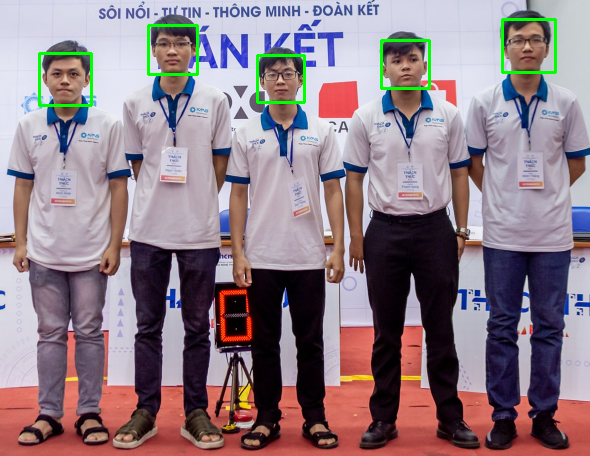

In [ ]:
image = cv2.imread(project_path + '/data/persons.jpg')
image = cv2.resize(image, None, fx = 0.5, fy = 0.5)

# detectMultiScale takes a grayscale image
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(image_gray,
                                      scaleFactor = 1.2,
                                      minNeighbors = 3)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(image)

In [ ]:
image = cv2.imread(project_path + '/data/large_group.jpg')

# detectMultiScale takes a grayscale image
image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(image_gray,
                                      scaleFactor = 1.2,
                                      minNeighbors = 3)

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (0, 255, 0), 2)

cv2_imshow(image)

Output hidden; open in https://colab.research.google.com to view.

## Lesson 3: Shape detection

Got a square!
Got a triangle!
Got a pentagon!
Got a circle!
Got a hexagon!


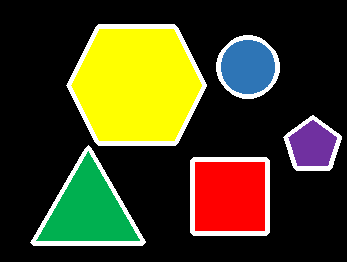

In [ ]:
image = cv2.imread(project_path + '/data/shapes.png')
image = cv2.resize(image, None, fx = 0.5, fy = 0.5)

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# cv2.threshold
# type = 1 => Threshold type binary inverted
retval, threshold = cv2.threshold(image_gray, 50, 255, 1)

# cv2.findContours
# mode = 1 => RetrievalModes: retrieves all of the contours without establishing any hierarchical relationships.
# method = 2 => ContourApproximationModes: applies one of the flavors of the Teh-Chin chain approximation algorithm
contours, h = cv2.findContours(threshold, 1, 2)

for contour in contours:
    # True for closed curves (in both functions)
    approx_points = cv2.approxPolyDP(contour, 1e-2*cv2.arcLength(contour, True), True)
    
    # What shape is it?
    n = len(approx_points)
    if n == 3:
        print('Got a triangle!')
    elif n == 4:
        if np.array([0, 0]) in contour:
            continue
        print('Got a square!')
    elif n == 5:
        print('Got a pentagon!')
    elif n == 6:
        print('Got a hexagon!')
    elif n == 16:
        print('Got a circle!')

    cv2.drawContours(image, [contour], 0, (255, 255, 255), 3)

cv2_imshow(image)

# Part 3: Projects

## Project 1: Ball tracking

In [ ]:
capture = cv2.VideoCapture(project_path + 'data/ball-tracking.mp4')
output = cv2.VideoWriter(project_path + 'data/ball-tracking-out.mp4', 
                         cv2.VideoWriter_fourcc('M', 'J', 'P', 'G'),
                         10, (1280, 720))

lower_yellow = np.array ([25, 70, 50])
upper_yellow = np.array ([35, 255, 255])

ball_centers = []

while capture.isOpened():
    ret, frame = capture.read()
    if ret is False:
        break
    
    # Detect ball
    frame_hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)
    mask_yellow = cv2.inRange(frame_hsv, lower_yellow, upper_yellow)
    contours, _ = cv2.findContours(mask_yellow, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


    center = None
    if len(contours) > 0:
        # Find ball center with minimum enclosing circle and moments
        contour = max(contours, key = cv2.contourArea)
        ((x, y), radius) = cv2.minEnclosingCircle(contour)
        moment = cv2.moments(contour)
        
        try:
            center = (int(moment['m10']/moment['m00']), int(moment['m01']/moment['m00']))
            cv2.circle(frame, center, 10, (255, 0, 0), -1)
            ball_centers.append(center)
        except:
            pass

        if len(ball_centers) > 2:
            for i in range(1, len(ball_centers)):
                cv2.line(frame, ball_centers[i-1], ball_centers[i], (0, 0, 255), 3)

        output.write(frame)

output.release()

## Project 2: Face recognition

In [2]:
!git clone https://github.com/misbah4064/face_recognition.git
!pip install face_recognition
%cd face_recognition

import face_recognition

Cloning into 'face_recognition'...
remote: Enumerating objects: 26, done.
remote: Counting objects: 100% (26/26), done.
remote: Compressing objects: 100% (24/24), done.
remote: Total 26 (delta 5), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (26/26), done.
     |████████████████████████████████| 100.1 MB 24 kB/s 
  Created wheel for face-recognition-models: filename=face_recognition_models-0.3.0-py2.py3-none-any.whl size=100566186 sha256=8ddc6fe0064d81ae7c6a36baaa966204c388284671a3bc2e6425f308a72c9848
  Stored in directory: /root/.cache/pip/wheels/d6/81/3c/884bcd5e1c120ff548d57c2ecc9ebf3281c9a6f7c0e7e7947a
Successfully built face-recognition-models
/content/face_recognition


In [3]:
# Create encoding profiles
face_1 = face_recognition.load_image_file('Donald Trump.jpg')
face_1_encoding = face_recognition.face_encodings(face_1)[0]

face_2 = face_recognition.load_image_file('jeffbezos.jpg')
face_2_encoding = face_recognition.face_encodings(face_2)[0]

face_3 = face_recognition.load_image_file('elon.jpg')
face_3_encoding = face_recognition.face_encodings(face_3)[0]

known_face_encodings = [face_1_encoding,
                        face_2_encoding,
                        face_3_encoding]
known_face_names = ['Donald Trump',
                    'Jeff Bezos',
                    'Elon Musk']

In [16]:
# Run face recognition on unknown faces
def recognize(file_name):
    unknown_image = face_recognition.load_image_file(file_name)
    unknown_image_to_draw = cv2.imread(file_name)

    face_locations = face_recognition.face_locations(unknown_image)
    face_encodings = face_recognition.face_encodings(unknown_image, face_locations)

    for (top, right, bottom, left), face_encodings in zip(face_locations, face_encodings):
        matches = face_recognition.compare_faces(known_face_encodings, face_encodings)
        name = "Unknown"
        
        face_distances = face_recognition.face_distance(known_face_encodings, face_encodings)
        best_match_index = np.argmin(face_distances)
        if matches[best_match_index]:
            name = known_face_names[best_match_index]

        
        if name == 'Jeff Bezos':
            cv2.rectangle(unknown_image_to_draw,
                        (left, top), (right, bottom),
                        color = (0, 255, 0),
                        thickness = 4)
            cv2.putText(unknown_image_to_draw, name, (left, top - 40),
                        fontFace = cv2.FONT_HERSHEY_COMPLEX,
                        fontScale = 2.5,
                        color = (0, 0, 255),
                        thickness = 8)
        else:
            cv2.rectangle(unknown_image_to_draw,
                        (left, top), (right, bottom),
                        color = (0, 255, 0),
                        thickness = 1)
            cv2.putText(unknown_image_to_draw, name, (left, top - 10),
                        fontFace = cv2.FONT_HERSHEY_COMPLEX,
                        fontScale = 0.75,
                        color = (0, 0, 255),
                        thickness = 2)
    # cv2_imshow(unknown_image_to_draw)
    return unknown_image_to_draw

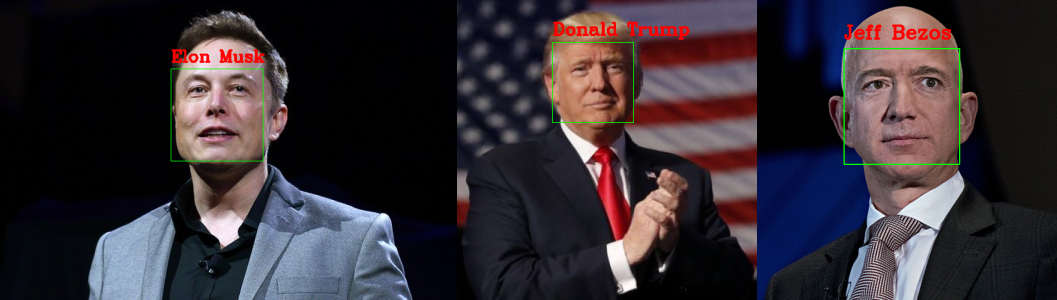

In [17]:
display_faces = []
height = 300
for file_name in ['unknown_el.jpg', 'unknown_do.jpg', 'unkown_je.jpg']:
    recognized_face = recognize(file_name)
    width = int(recognized_face.shape[1] * 300/ recognized_face.shape[0])
    display_faces.append(cv2.resize(recognized_face, (width, height), interpolation = cv2.INTER_AREA))

display = np.hstack((display_faces[0], display_faces[1], display_faces[2]))
cv2_imshow(display)